In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from src.convexbody.objects import *
from src.convexbody.sampling.line import Line

Center: [ 1.  3.]
Half-axis length: [ 1.  2.]
volume: 6.28318530718 6.28318530718
Are all samples inside:  True


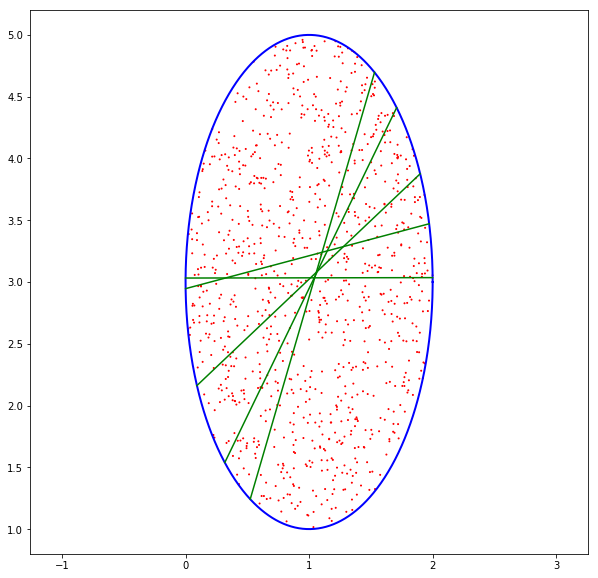

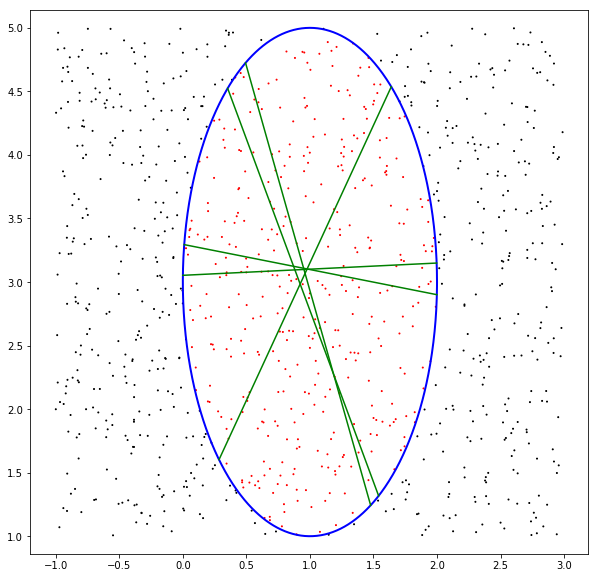

In [4]:
def plot_ball(ellipsoid, n_samples=0, sample_inside=True):
    center = ellipsoid.center
    sides = ellipsoid.half_axis_length
    
    thetas = np.linspace(0, 2*np.pi, 1000)
    x, y = center[0] + sides[0] * np.cos(thetas), center[1] + sides[1] * np.sin(thetas)
    plt.figure(figsize=(10,10))
    plt.plot(x, y, color='b', linewidth=2)
    plt.axis('equal')
    
    if n_samples > 0:
        if sample_inside:
            samples = ellipsoid.sample(n_samples)
            inside = ellipsoid.is_inside(samples)
            print("Are all samples inside: ", np.all(inside))
        else:
            samples = Cube(center=center, length=2*np.max(sides)).sample(n_samples)
            inside = ellipsoid.is_inside(samples)
        plt.scatter(samples[:,0], samples[:,1], c=['r' if y else 'k' for y in inside], s=1)
    
    for _ in range(5):
        line = Line.sample_line(point=center + 0.1*np.random.normal(size=(2,)))
        a, b = ellipsoid.intersection(line).get_extremes()
        plt.plot([a[0], b[0]], [a[1], b[1]], color='g')
    
ball = Ellipsoid(center=[1,3], half_axis_length=[1,2])
#ball = Ball(center=[-1,1], radius=2)
#ball = UnitBall(dim=2)
print(ball)
print("volume:", ball.volume, np.pi * np.prod(ball.half_axis_length))
plot_ball(ball, 1000, True)
plot_ball(ball, 1000, False)

Low: [-1. -1.]
High: [ 1.  1.]
Center: [ 0.  0.]
Side_length: 2.0
volume: 4.0
Are all samples inside:  True


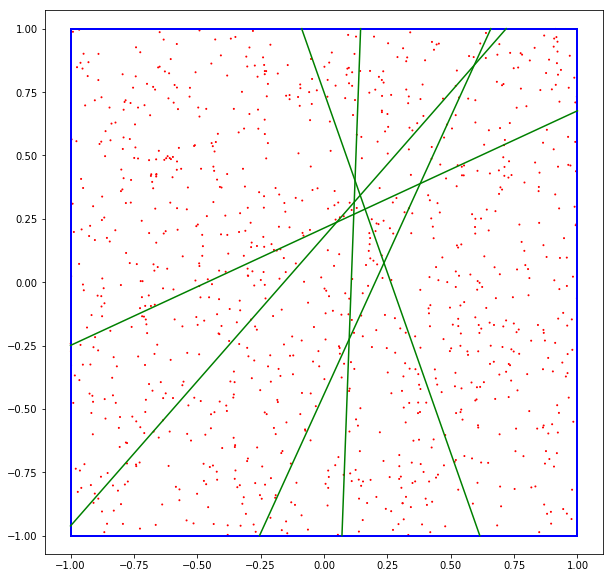

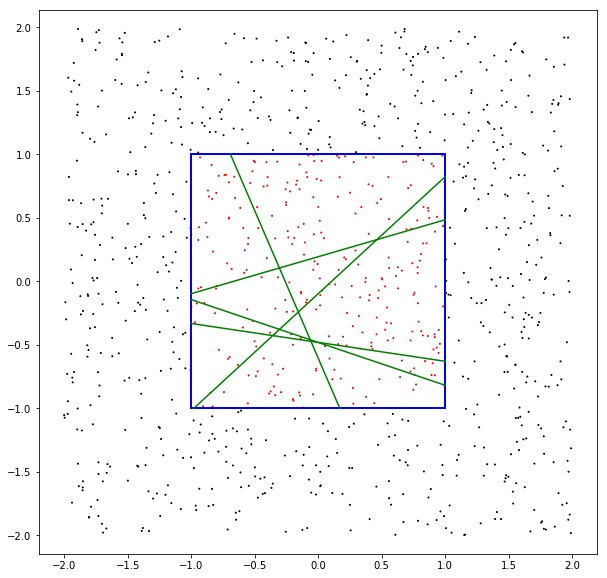

In [5]:
def plot_box(box, n_samples=0, sample_inside=True):
    plt.figure(figsize=(10,10))
    plt.plot([box.low[0], box.low[0]], [box.low[1], box.high[1]], color='b', linewidth=2)
    plt.plot([box.low[0], box.high[0]], [box.high[1], box.high[1]], color='b', linewidth=2)
    plt.plot([box.high[0], box.high[0]], [box.high[1], box.low[1]], color='b', linewidth=2)
    plt.plot([box.low[0], box.high[0]], [box.low[1], box.low[1]], color='b', linewidth=2)
    plt.axis('equal')
    
    if n_samples > 0:
        if sample_inside:
            samples = box.sample(n_samples)
            inside = box.is_inside(samples)
            print("Are all samples inside: ", np.all(inside))
        else:
            samples = Cube(center=box.center, length=2*np.max(box.side_length)).sample(n_samples)
            inside = box.is_inside(samples)
        plt.scatter(samples[:,0], samples[:,1], c=['r' if y else 'k' for y in inside], s=1)
    
    for _ in range(5):
        line = Line.sample_line(point=box.center + 0.3*np.random.normal(size=(2,)))
        a, b = box.intersection(line).get_extremes()
        plt.plot([a[0], b[0]], [a[1], b[1]], color='g')
    
#box = Box(low=[1,3], high=[3,11])
#box = Cube(center=[-1,1], length=2)
box = UnitCube(dim=2)
print(box)
print("volume:", box.volume)
plot_box(box, 1000, True)
plot_box(box, 1000, False)

RuntimeError: Line does not intersect polytope.

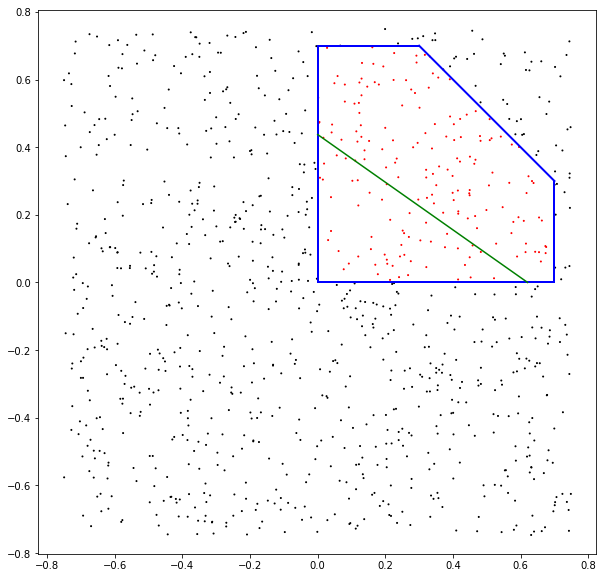

In [6]:
def plot_polytope(polytope, n_samples=0):
    plt.figure(figsize=(10,10))
    plt.plot([0,0.7], [0,0], c='b', linewidth=2)
    plt.plot([0,0], [0,0.7], c='b', linewidth=2)
    plt.plot([0,0.3], [0.7,0.7], c='b', linewidth=2)
    plt.plot([0.3,0.7], [0.7,0.3], c='b', linewidth=2)
    plt.plot([0.7,0.7], [0,0.3], c='b', linewidth=2)
    plt.axis('equal')
    
    if n_samples > 0:
        samples = Cube(center=[0,0], length=1.5).sample(n_samples)
        inside = polytope.is_inside(samples)
        plt.scatter(samples[:,0], samples[:,1], c=['r' if y else 'k' for y in inside], s=1)
    
    for _ in range(10):
        line = Line.sample_line(point=[0.0,0.35] + 0.05*np.random.normal(size=(2,)))
        a, b = polytope.intersection(line).get_extremes()
        plt.plot([a[0], b[0]], [a[1], b[1]], color='g')

A = None
b = None
M = [[1,1], [-1,-1]]
q = [1, 0.2]
l = [0, 0]
h = [0.7, 0.7]
polytope = Polytope(A, b, M, q, l, h)
print(polytope)
plot_polytope(polytope, 1000)

[ 0.  1.] [ 0.8  0.2]


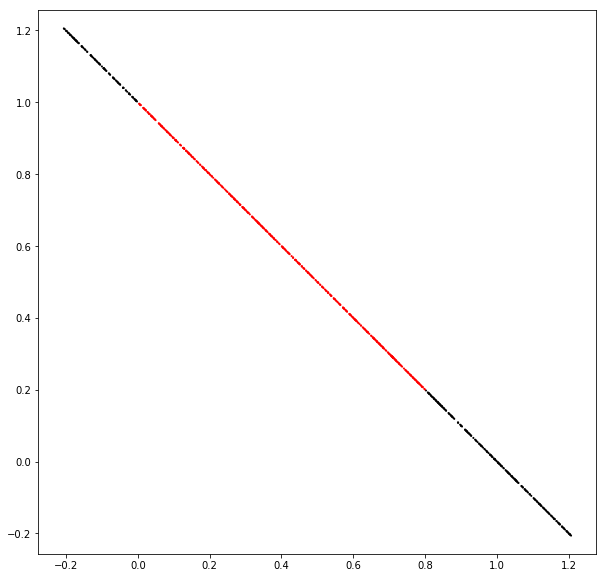

In [7]:
def plot_polytope(polytope, n_samples=0):
    plt.figure(figsize=(10,10))
    plt.axis('equal')
    
    if n_samples > 0:
        samples = Line([0.5,0.5], [1, -1]).get_segment(-1, 1).sample(n_samples)
        inside = polytope.is_inside(samples)
        plt.scatter(samples[:,0], samples[:,1], c=['r' if y else 'k' for y in inside], s=1)
    
    line = Line([0.5,0.5], [1, -1])
    a, b = polytope.intersection(line).get_extremes()
    print(a, b)


A = [1,1]
b = [1]
M = [1,0]
q = [0.8]
l = [0, 0]
h = None
polytope = Polytope(A, b, M, q, l, h)
print(polytope)
plot_polytope(polytope, 1000)

In [8]:
polytope.projection_matrix

array([[ 0.5, -0.5],
       [-0.5,  0.5]])

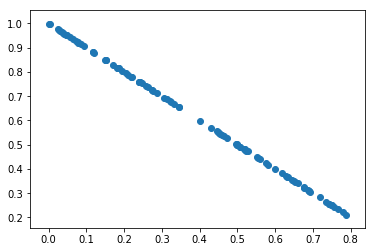

In [9]:
from src.convexbody.sampling.markov_samplers import HitAndRunSampler

sampler = HitAndRunSampler(chain_length=100)
sample = sampler.sample_chain(polytope, [0.5, 0.5])
#sample = sampler.uniform(polytope, [0.5, 0.5], 100)
plt.scatter(sample[:,0], sample[:,1])

In [54]:
# actboost polytope
from src.version_space.actboost import ActboostPolytope
vs = ActboostPolytope(dim=3)
vs.update(np.array([1,-1, 0]), -1)
vs.update(np.array([1,-0.5, 0]), -1)

print(vs.inequality_constrain.matrix, vs.inequality_constrain.vector)
vs.get_point()

[[ 1.  -1.   0. ]
 [ 1.  -0.5  0. ]] [ 0.  0.]


array([ 0.16666667,  0.66666667,  0.16666667])

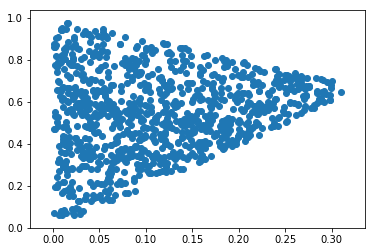

In [55]:
sampler = HitAndRunSampler(chain_length=1000)
sample = sampler.sample_chain(vs, [0.3, 0.7, 0])
plt.scatter(sample[:,0], sample[:,1])